In [64]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
plt.style.use('ggplot')

In [2]:
os.getcwd()

'F:\\bitbucket\\CodingChallange\\glassdoor'

In [3]:
df=pd.read_csv("ozan_p_pApply_intern_challenge_03_20_min.csv", encoding='utf8')

In [4]:
df.dtypes

title_proximity_tfidf          float64
description_proximity_tfidf    float64
main_query_tfidf               float64
query_jl_score                 float64
query_title_score              float64
city_match                     float64
job_age_days                   float64
apply                            int64
search_date_pacific             object
u_id                            object
mgoc_id                          int64
dtype: object

In [5]:
df.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,u_id,mgoc_id
0,0.000000,0.198377,0.000000,0.022545,0.014706,1.0,16.0,0,2018-01-24,5f42afe6-e7d0-4822-b95e-57ae0682fa24,10148
1,0.000000,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
2,0.000000,0.000000,9.308552,0.005782,0.000003,-1.0,0.0,0,2018-01-24,5f4c930d-fb3c-4b90-b121-b0fdc3dce56d,10016
3,11.992127,0.118237,3.462835,0.017337,0.050844,0.0,23.0,0,2018-01-25,5f562c30-b0ad-45ec-9427-145624e0f34b,10039
4,8.298727,0.000000,0.000000,0.019160,0.018750,1.0,0.0,0,2018-01-23,5f5991c5-253f-4d30-aad1-2abfe9d50de3,-1


In [6]:
df.search_date_pacific=pd.to_datetime(df.search_date_pacific)
df.rename(columns={'apply':'Apply'}, inplace=True)

In [7]:
df.shape

(1200890, 11)

In [8]:
df.groupby(by="mgoc_id").size()

mgoc_id
-1        18078
 10001     4248
 10002     6800
 10003    20447
 10004     1362
 10005    26316
 10006    27400
 10007    30502
 10008      663
 10009     3809
 10010      802
 10011     2552
 10012     3135
 10013    30077
 10014    17270
 10015     2402
 10016     7804
 10017     6480
 10018     2204
 10019     1929
 10020     3879
 10021      931
 10022     3121
 10023     3939
 10024     5713
 10025     4076
 10026      643
 10027     3748
 10028     1747
 10029     5272
          ...  
 10128     6338
 10129     5187
 10130     6526
 10131     4824
 10132    75586
 10133     1117
 10134     4836
 10135     9905
 10136     2756
 10137     6920
 10138    18731
 10139     8834
 10140     2810
 10141    15258
 10142      498
 10143      977
 10144     1502
 10145    16060
 10146     2671
 10147      363
 10148     5103
 10149     1453
 10150     2148
 10151     7022
 10152     6714
 10153     3929
 10154     8225
 10155      403
 10156      914
 10157     8717
Length: 157, dty

In [9]:
min(df.search_date_pacific)

Timestamp('2018-01-21 00:00:00')

In [10]:
df_train=df[df.search_date_pacific<='2018-01-26']

In [11]:
df_test=df[df.search_date_pacific=='2018-01-27']

In [12]:
df_train.shape[0]+df_test.shape[0]

1200890

In [13]:
sum(df.Apply)

108003

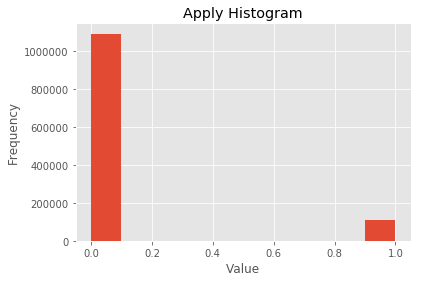

In [50]:
plt.hist(df.Apply)
plt.title("Apply Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [23]:
X_train=df_train.iloc[:,0:6]
Y_train=df_train.Apply
X_test=df_test.iloc[:,0:6]
Y_test=df_test.Apply

# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train,Y_train)

In [52]:
clf

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
10    0
Name: Apply, dtype: int64

# CART

# NN based

# Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [22]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
#evaluate model
Y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[105940,      0],
       [ 10586,      0]], dtype=int64)

In [70]:
#predict probability
probY_test=LogReg.predict_proba(X_test)
Y_pred=LogReg.predict(X_test)

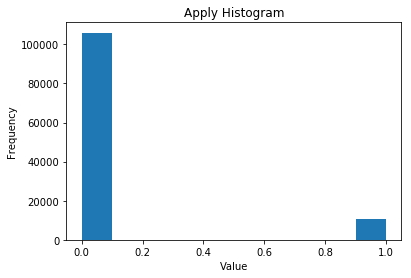

In [46]:
plt.hist(Y_test)
plt.title("Apply Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
metrics.auc(fpr, tpr)
#not good!!!!!!!

0.5

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [57]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
Y_pred_rd=clf.predict(X_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
sum(Y_pred_rd)

0

In [72]:
#evaluate model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_rd)
confusion_matrix

array([[105940,      0],
       [ 10586,      0]], dtype=int64)

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_rd)
metrics.auc(fpr, tpr)

0.5

In [68]:
#not good also...

array([ 0.,  1.])

# Single Tree based method


In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth =1000)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
Y_pre_tree=clf.predict(X_test)

In [85]:
sum(Y_pre_tree)
#evaluate model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pre_tree)
confusion_matrix

array([[105446,    494],
       [ 10524,     62]], dtype=int64)

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pre_tree)
metrics.auc(fpr, tpr)

0.50059688759372833

# Bayesian network

2